In [19]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("deeplearning.mplstyle")
np.set_printoptions(precision=2)

In [20]:
X_train=np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train=np.array([460,232,178])

In [21]:
X_train.shape
y_train.shape

(3, 4)

(3,)

In [22]:
print(X_train)
print(f"X shape: {X_train.shape}")
print(f"X type: {type(X_train)}")

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
X shape: (3, 4)
X type: <class 'numpy.ndarray'>


In [23]:
print(y_train)
print(f"y shape: {y_train.shape}")
print(f"y type: {type(y_train)}")

[460 232 178]
y shape: (3,)
y type: <class 'numpy.ndarray'>


In [24]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [25]:
print(f"w_init shape: {w_init.shape}, w_init type: {type(w_init)}")
print(f"b_init type: {type(b_init)}")

w_init shape: (4,), w_init type: <class 'numpy.ndarray'>
b_init type: <class 'float'>


In [26]:
def predict_single_loop(x,w,b):
    """
    single predict using linear regression

    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model parameters
        b (scalar): model parameter
    
    Returns:
        p (scalar): prediction
    """

    n=x.shape[0]
    p=0
    for i in range(n):
        p_i=x[i]*w[i]
        p=p+p_i
    p=p+b
    return(p)    

In [27]:
x_vec=X_train[0]
print(f"x_vec shape: {x_vec.shape}, x_vec value: {x_vec}")

x_vec shape: (4,), x_vec value: [2104    5    1   45]


In [28]:
f_wb=predict_single_loop(x_vec,w_init,b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")
y_train[0]

f_wb shape: (), prediction: 459.9999976194083


460

In [29]:
def predict(x,w,b):
    """
    single predict using linear regression

    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model parameters
        b (scalar): model parameter
    
    Returns:
        p (scalar): prediction
    """

    p=np.dot(x,w)+b
    return p

In [30]:
predict(x_vec,w_init,b_init)

459.9999976194083

In [31]:
def compute_cost(X,y,w,b):
    """
    compute cost

    Args:
        X (ndarray(m,n)): Data, m examples with n features
        y (ndarray (m,)): target values
        w (ndarray (n,)): model parameter
        b (scalar): model parameter
    Returns:
        cost (scalar): cost    
    """
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [32]:
cost=compute_cost(X_train,y_train,w_init,b_init)
print(f"Cost at optimal w: {cost}")

Cost at optimal w: 1.5578904428966628e-12


In [33]:
def compute_cost1(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost


In [34]:
compute_cost1(X_train,y_train,w_init,b_init)

1.5578904428966628e-12

In [35]:
def compute_gradient(X,y,w,b):
    """
    Args:
        X (ndarray (m,n)): Data, m examples with n features
        y (ndarray (m)): target values
        w (ndarray (n)): model parameters
        b (scalar): model parameter

    Returns:
        dj_dw (ndarray(n,)): The gradient of the cost w.r.t the parameters w
        dj_db (scalar): The gradient of the cost w.r.t the parameter b
    """

    m=X.shape[0]
    n=X.shape[1]
    dj_dw=np.zeros((n,))
    dj_db=0

    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i,j]
        dj_db=dj_db+err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_db,dj_dw

In [36]:
tmp_dj_db,tmp_dj_dw=compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_db at initial w,b: {tmp_dj_db}")
print(f"dj_dw at initial w,b: {tmp_dj_dw}")

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [52]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha

    Args:
        X(ndarray(m,n)): Data, m examples with n features
        y(ndarray(m,)): target values
        w_in(ndarray(n,)): initial model parameters
        b_in(scalar): initial model parameter
        cost_function: function to compute cost
        gradient_function: function to compute gradient
        alpha(float): learning rate
        num_iters(int): number of iterations to run gradient descent
    
    Returns:
        w(ndarray(n,)): Updated value of parameters
        b (scalar): Updated value of parameter
    """

    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):
        dj_db,dj_dw=gradient_function(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<100000:
            J_history.append(cost_function(X,y,w,b))
        
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration: {i:4d}  Cost: {J_history[-1]:8.2f}")
    return w,b,J_history

In [69]:
initial_w=np.zeros_like(w_init)
initial_b=0.
iterations=1000
alpha=5.0e-7
w_final,b_final,J_hist=gradient_descent(X_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)

Iteration:    0  Cost:  2529.46
Iteration:  100  Cost:   695.99
Iteration:  200  Cost:   694.92
Iteration:  300  Cost:   693.86
Iteration:  400  Cost:   692.81
Iteration:  500  Cost:   691.77
Iteration:  600  Cost:   690.73
Iteration:  700  Cost:   689.71
Iteration:  800  Cost:   688.70
Iteration:  900  Cost:   687.69


In [70]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final}")

b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07]


In [71]:
m,_=X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i],w_final)+b_final:0.2f}, target value: {y_train[i]}")

prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


In [72]:
J_hist

[2529.4629522316304,
 765.8336829952988,
 699.6290280210446,
 697.1337425623095,
 697.0296591788104,
 697.0153256006653,
 697.0043615139087,
 696.9935248096691,
 696.9826938019223,
 696.9718639233548,
 696.9610350024587,
 696.9502070327148,
 696.939380013799,
 696.9285539456151,
 696.9177288280792,
 696.9069046611058,
 696.8960814446137,
 696.8852591785139,
 696.8744378627272,
 696.8636174971624,
 696.852798081742,
 696.8419796163756,
 696.8311621009815,
 696.8203455354765,
 696.8095299197731,
 696.7987152537909,
 696.7879015374392,
 696.7770887706384,
 696.7662769533032,
 696.7554660853489,
 696.7446561666906,
 696.7338471972458,
 696.7230391769273,
 696.7122321056518,
 696.7014259833372,
 696.6906208098934,
 696.6798165852423,
 696.6690133092947,
 696.6582109819711,
 696.6474096031822,
 696.6366091728472,
 696.6258096908772,
 696.615011157195,
 696.6042135717122,
 696.5934169343424,
 696.5826212450056,
 696.5718265036138,
 696.5610327100843,
 696.5502398643335,
 696.5394479662783,
 6

Text(0.5, 1.0, 'Cost vs. iteration')

Text(0.5, 1.0, 'Cost vs. iteration (tail)')

Text(0, 0.5, 'Cost')

Text(0, 0.5, 'Cost')

Text(0.5, 0, 'iteration step')

Text(0.5, 0, 'iteration step')

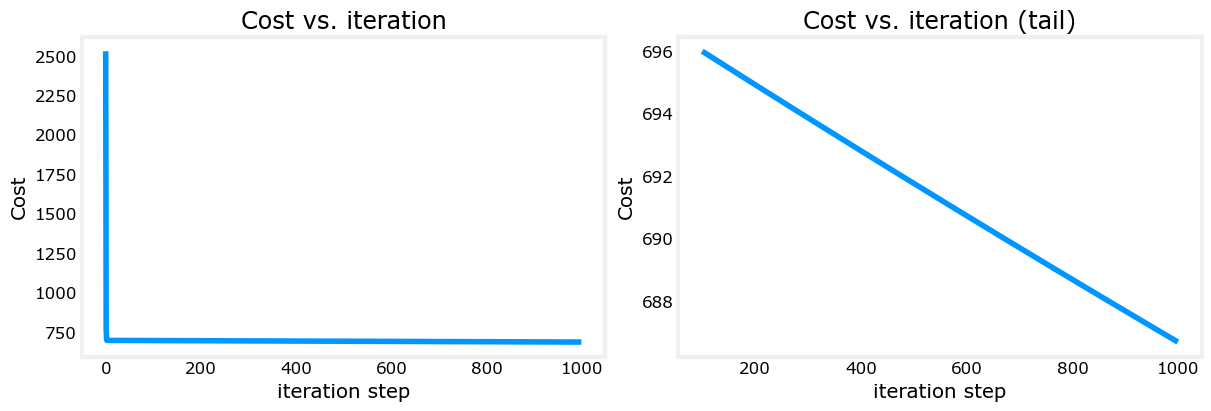

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()